# Introduction to Boundary Value Problems

In the study of differential equations, two fundamental types of problems arise: **initial value problems (IVPs)** and **boundary value problems (BVPs)**.

- **Initial Value Problems (IVPs):**  
    In an IVP, all the conditions required to determine a unique solution are specified at a single point, typically at the start of the domain. For an ODE of order $n$, you need $n$ initial values (e.g., $y(0)$, $y'(0)$, ..., $y^{(n-1)}(0)$). IVPs are commonly encountered in time-dependent processes, such as the evolution of a physical system from a known starting state.

- **Boundary Value Problems (BVPs):**  
    In contrast, a BVP involves finding a solution to a differential equation that satisfies conditions at more than one point, often at the boundaries of the domain. For an ODE of order $n$, you need $n$ boundary conditions, which may be distributed between the endpoints (e.g., $y(a)$ and $y(b)$ for a second-order ODE). BVPs frequently arise in steady-state physical systems, such as heat distribution, structural mechanics, and electrostatics.

**Key Differences:**
- IVPs require all $n$ conditions at a single point; BVPs require $n$ conditions at multiple points.
- IVPs are typically solved using time stepping methods like Euler’s method, Runge-Kutta or Adams methods; BVPs often require specialized techniques such as shooting methods, finite difference methods, or collocation methods.

Understanding the distinction between IVPs and BVPs is crucial for selecting appropriate mathematical and numerical tools to solve real-world problems modeled by differential equations.

To uniquely determine the solution to a differential equation, it is essential to specify the correct number of initial or boundary values according to the order of the equation:

- For IVPs, provide $n$ initial values at the starting point.
- For BVPs, provide $n$ boundary values, distributed at the boundaries of the domain.

These conditions ensure that the problem is well-posed and that a unique solution exists.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.integrate import solve_ivp
import numpy as np


## Solving Boundary value problems 

To answer this question, we can frame the problem into a boundary value problem for a second-order ODE. The ODE is:
$$
\displaystyle\frac{𝑑^2𝑦}{𝑑𝑡^2}=−𝑔
$$
with the two boundary conditions are: 𝑦(0)=0 and 𝑦(5)=50. And we want to answer the question, what should 𝑦′(0) be to fulfill the $y(5)$ condition?

This is a quite simple question, we can solve it analytically easily. The general solution for the ODE $\frac{d^2y}{dt^2} = -g$ 
$$
y(t) = - \frac{1}{2} g t^2 + a t + b
$$

with $y(0)=0$ and $y(t_1)=y_1$ we get:
$$
y(t) = (\frac{y_1}{t_1} + \frac{g}{2} t_1)t  - \frac{1}{2} g t^2
$$


### Shooting techniques

Define the problem as a initial value problem. From the analytical solution: 
$$
y'(t) = (\frac{y_1}{t_1} + \frac{g}{2} t_1)  -  g 
$$
So the right answer would be that $𝑦′(0)=34.5$. 

First, we will reduce the order of the function, the second-order ODE becomes:
$$
\begin{array}{rcl}
\displaystyle\frac{𝑑𝑦}{𝑑𝑡}&=&𝑣\\ \\
\displaystyle\frac{𝑑v}{𝑑𝑡}&=&−𝑔
\end{array}
$$

 Define the rhs function and the analytical solution. 

In [3]:
F = lambda t, s: \
  np.dot(np.array([[0,1],[0,-9.8/s[1]]]),s)

def analytical_solution(t,t1,y1):
    g = 9.8
    return (y1/t1 + g*t1/2)*t - g*t**2/2
    

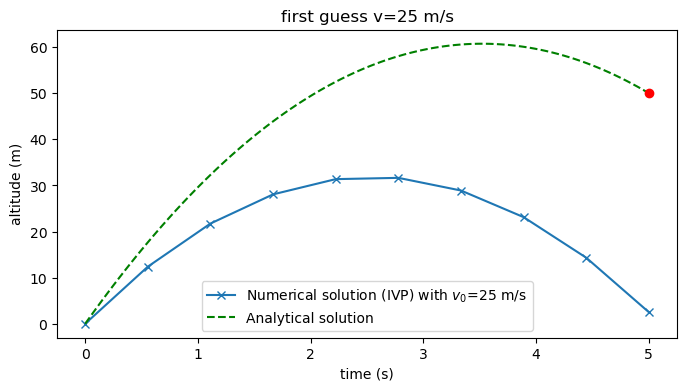

In [4]:
t_dense = np.linspace(0, 5, 100)
y_analytical = analytical_solution(t_dense, 5, 50)
y0 = 0 # initial altitude
v0 = 25 # initial velocity guess. Try different values here
t_eval = np.linspace(0, 5, 10) # times to evaluate solution
sol = solve_ivp(F, [0, 5], \
                [y0, v0], t_eval = t_eval)

plt.figure(figsize = (8, 4))
plt.plot(sol.t, sol.y[0], 'x-',label=f'Numerical solution (IVP) with $v_0$={v0} m/s')
plt.plot(t_dense, y_analytical, 'g--', label='Analytical solution') 
plt.plot(5, 50, 'ro')
plt.xlabel('time (s)')
plt.ylabel('altitude (m)')
plt.title(f'first guess v={v0} m/s')
plt.legend()
plt.show()

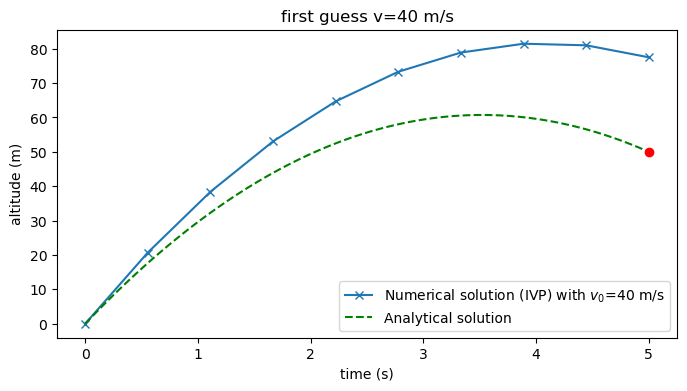

In [5]:
v0 = 40 # initial velocity guess. Try different values here

sol = solve_ivp(F, [0, 5], \
                [y0, v0], t_eval = t_eval)

plt.figure(figsize = (8, 4))
plt.plot(sol.t, sol.y[0], 'x-',label=f'Numerical solution (IVP) with $v_0$={v0} m/s')
plt.plot(t_dense, y_analytical, 'g--', label='Analytical solution') 
plt.plot(5, 50, 'ro')
plt.xlabel('time (s)')
plt.ylabel('altitude (m)')
plt.title(f'first guess v={v0} m/s')
plt.legend()
plt.show()

Make this into a function with the guess of v[0] as input

In [6]:
def solve_ode_shoot(v0, plot=True):
    t_span = np.linspace(0, 5, 100)
    y0 = 0
    t_eval = np.linspace(0, 5, 10)
    sol = solve_ivp(F, [0, 5], [y0, v0], t_eval=t_eval)
    
    if plot:
        plt.figure(figsize=(8, 4))
        plt.plot(sol.t, sol.y[0])
        plt.plot(5, 50, 'ro')
        plt.xlabel('time (s)')
        plt.ylabel('altitude (m)')
        plt.title(f'first guess v={v0} m/s')
        plt.show()
    else:
        return sol.y[0][-1]
    


<font color='green'> Try a few new values, v[0]=25 undershoot, v[0]=40 overshoot, what will be the next natural guess?  </font>

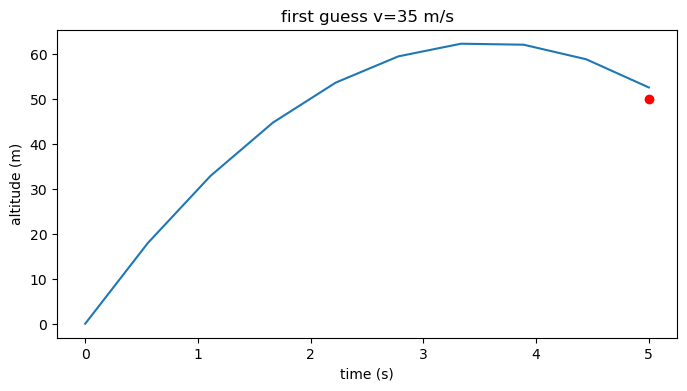

End value with v(0)= 35 is 52.500000000000036


In [7]:
v0=35
solve_ode_shoot(v0=v0, plot=True)
print(f'End value with v(0)= {v0} is {solve_ode_shoot(v0=35, plot=False)}')


Lets' build an iteration

In [8]:
v_old=1
v_new=100
print(f'v(0)= {v_old} gives {solve_ode_shoot(v_old, plot=False)}')
print(f'v(0)= {v_new} gives {solve_ode_shoot(v_new, plot=False)}')
v=0.5*(v_old+v_new)
print(f'v(0)= {v} gives {solve_ode_shoot(v, plot=False)}')


v(0)= 1 gives -117.50000000000003
v(0)= 100 gives 377.50000000000017
v(0)= 50.5 gives 130.00000000000003


v(0)= 50.5 gives 130.00000000000003
v(0)= 25.75 gives 6.250000000000028
v(0)= 38.125 gives 68.12499999999999
v(0)= 31.9375 gives 37.18750000000004
v(0)= 35.03125 gives 52.65625000000003
v(0)= 33.484375 gives 44.921875
v(0)= 34.2578125 gives 48.789062500000014
v(0)= 34.64453125 gives 50.72265625000004
v(0)= 34.451171875 gives 49.7558593750001
v(0)= 34.5478515625 gives 50.23925781250007
v(0)= 34.49951171875 gives 49.99755859375006
v(0)= 34.523681640625 gives 50.118408203125064
v(0)= 34.5115966796875 gives 50.057983398437514
v(0)= 34.50555419921875 gives 50.02777099609381
v(0)= 34.502532958984375 gives 50.012664794921896
v(0)= 34.50102233886719 gives 50.00511169433602
v(0)= 34.500267028808594 gives 50.00133514404301
v(0)= 34.4998893737793 gives 49.999446868896555
Converged to v(0) = 34.4998893737793 after 17 iterations


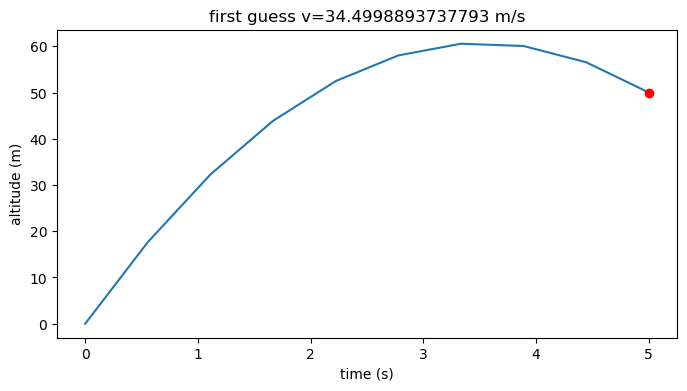

In [9]:
tolerance = 1e-3
max_iterations = 100
target_value = 50
iteration = 0
v_old=1
v_new=100

while iteration < max_iterations:
    v_mid = 0.5 * (v_old + v_new)
    result = solve_ode_shoot(v_mid, plot=False)
    print(f'v(0)= {v_mid} gives {result}')
    if abs(result - target_value) < tolerance:
        print(f'Converged to v(0) = {v_mid} after {iteration} iterations')
        solve_ode_shoot(v_mid, plot=True)
        break
    
    if (result - target_value) * (solve_ode_shoot(v_old, plot=False) - target_value) < 0:
        v_new = v_mid
    else:
        v_old = v_mid
    
    iteration += 1

if iteration == max_iterations:
    print(f'Did not converge after {max_iterations} iterations')

### Use of scipy optimization.

It can be solved by employing the fsolve function in the scipy.optimize module.

In [10]:

y0 = [0, 40]  # Initial condition as a list of numerical values
t_eval = np.linspace(0, 5, 100)

def objective(v0):
    sol = solve_ivp(F, [0, 5], \
            [y0[0], v0[0]], t_eval = t_eval)
    y = sol.y[0]
    return y[-1] - 50

v0, = fsolve(objective, 10)
print(v0)

34.49999999999999


### Finite difference method
The finite difference method is a numerical technique for approximating solutions to differential equations by replacing derivatives with difference quotients. Instead of working with continuous functions, the domain is discretized into a grid of points, and derivatives are estimated using values at these points.

For example, the first derivative of a function $y(x)$ at a grid point $x_i$ can be approximated by the central difference formula:
$$
y'(t_i) \approx \frac{y_{i+1} - y_{i-1}}{2h}
$$
where $h$ is the spacing between grid points. Similarly, the second derivative is approximated by:
$$
y''(t_i) \approx \frac{y_{i-1} - 2y_i + y_{i+1}}{h^2}
$$

By substituting these finite difference approximations into the differential equation, we obtain a system of algebraic equations that can be solved for the unknown values at the grid points. This approach is widely used for boundary value problems and partial differential equations, providing a straightforward way to translate continuous mathematical models into discrete computations.

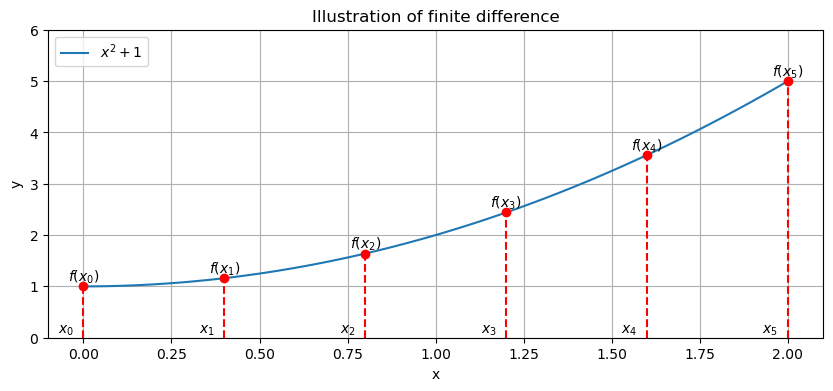

In [11]:
import numpy as np

import matplotlib.pyplot as plt

# Define the function
def f(x):
    return x**2+1

# Define the x values
x_values = np.linspace(0, 2, 6)
y_values = f(x_values)

# Plot the function
x = np.linspace(0, 2, 100)
y = f(x)

plt.figure(figsize=(10, 4))
plt.plot(x, y, label='$x^2+1$')

# Plot the vertical lines and label the points
for i, (x_val, y_val) in enumerate(zip(x_values, y_values)):
    plt.vlines(x_val, 0, y_val, colors='r', linestyles='dashed')
    plt.text(x_val-0.05, +0.1, f'$x_{i}$', ha='center')
    plt.plot(x_val, y_val, 'ro')
    plt.text(x_val, y_val + 0.1, f'$f(x_{i})$', ha='center')

# Set labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Illustration of finite difference')
plt.legend()
plt.grid(True)
plt.ylim(0, 6)

# Show the plot
plt.show()

The differential equation is enforced only at the grid points. Ordinary Taylor expansion:
$$\begin{array}{rcl}
𝑦(𝑥+ℎ)&=&𝑦(𝑥)+ℎ𝑦'(𝑥)+\frac{1}{2}ℎ^2 𝑦''(𝑥)+O(h^3)\\ \\
𝑦(𝑥−ℎ)&=&𝑦(𝑥)-ℎ𝑦'(𝑥)+\frac{1}{2}ℎ^2 𝑦''(𝑥)+O(h^3)
\end{array}
$$

gives the first and second derivatives are:
$$ 
\begin{array}{rcl} 
\displaystyle\frac{dy}{𝑑𝑥}&=&\displaystyle\frac{𝑦_{𝑖+1}−𝑦_{𝑖−1}}{2ℎ}\\ \\
\displaystyle\frac{d^2y}{𝑑x^2}&=&\displaystyle\frac{𝑦_{𝑖−1}−2𝑦_𝑖+𝑦_{𝑖+1}}{ℎ^2}
\end{array}
$$

In our case the time interval is $x\in[0,5]$, by using N grid points and the finite difference approximated derivatives, we get
$$ 
\begin{array}{l} 
𝑦_0=0 \\ \\
𝑦_{𝑖−1}−2𝑦_𝑖+𝑦_{𝑖+1}=−𝑔ℎ^2, \ \ 𝑖=1,2,...,𝑛−1 \\ \\
𝑦_{n}=50
\end{array}
$$
with $h=5/(N-1)$.

In matrix notation:
$$
\begin{bmatrix}
1 & 0 & 0 & \cdots & 0 & 0 & 0 \\
1 & -2 & 1 & \cdots & 0 & 0 & 0 \\
0 & 1 & -2 & 1 & \cdots & 0 & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \vdots \\
0 & 0 & 0 & \cdots & 1 & -2 & 1 \\
0 & 0 & 0 & \cdots & 0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
y_0 \\
y_1 \\
y_2 \\
\vdots \\
y_{N-2} \\
y_{N-1}
\end{bmatrix}
=
\begin{bmatrix}
0 \\
-gh^2 \\
-gh^2 \\
\vdots \\
-gh^2 \\
50
\end{bmatrix}
$$

This can be solved using our expertise in linear algebra.

In [12]:
from ipywidgets import interact, IntSlider

# Define the parameters
L = 5  # Length of the domain
N = 5  # Number of grid points
dx = L / (N - 1)  # Grid spacing
g = 9.8  # Acceleration due to gravity

# Define the grid
x = np.linspace(0, L, N)

# Define the boundary conditions
y0 = 0
yL = 50

# Initialize the solution array
y = np.zeros(N)

# Set the boundary conditions
y[0] = y0
y[-1] = yL

# Construct the coefficient matrix and the right-hand side vector
A = np.zeros((N, N))
b = np.zeros(N)

# Fill the coefficient matrix and the right-hand side vector
for i in range(1, N-1):
    A[i, i-1] = 1 
    A[i, i] = -2 
    A[i, i+1] = 1 
    b[i] = -g*dx**2

# Apply the boundary conditions to the coefficient matrix and the right-hand side vector
A[0, 0] = 1
A[-1, -1] = 1
b[0] = y0
b[-1] = yL

# Solve the system of linear equations
y = np.linalg.solve(A, b)
def finite_difference_solution(N):
    L = 5
    dx = L / (N - 1)
    g = 9.8
    x = np.linspace(0, L, N)
    y0 = 0
    yL = 50
    y = np.zeros(N)
    y[0] = y0
    y[-1] = yL
    A = np.zeros((N, N))
    b = np.zeros(N)
    for i in range(1, N-1):
        A[i, i-1] = 1 
        A[i, i] = -2 
        A[i, i+1] = 1 
        b[i] = -g*dx**2
    A[0, 0] = 1
    A[-1, -1] = 1
    b[0] = y0
    b[-1] = yL
    y = np.linalg.solve(A, b)
    plt.figure(figsize=(10, 4))
    plt.plot(x, y, 'b.-',label='Finite Difference Solution')
    plt.plot(5, 50, 'ro', label='Boundary condition')
    plt.xlabel('time (s)')
    plt.ylabel('altitude (m)')
    plt.legend()
    plt.title(f'Solution using Finite Difference Method (N={N})')
    plt.show()

interact(finite_difference_solution, N=IntSlider(min=5, max=100, step=1, value=10))


interactive(children=(IntSlider(value=10, description='N', min=5), Output()), _dom_classes=('widget-interact',…

<function __main__.finite_difference_solution(N)>

<font color='green'> Change the number of grid points, what do you see? </font>


### Using scipys solve_bvp

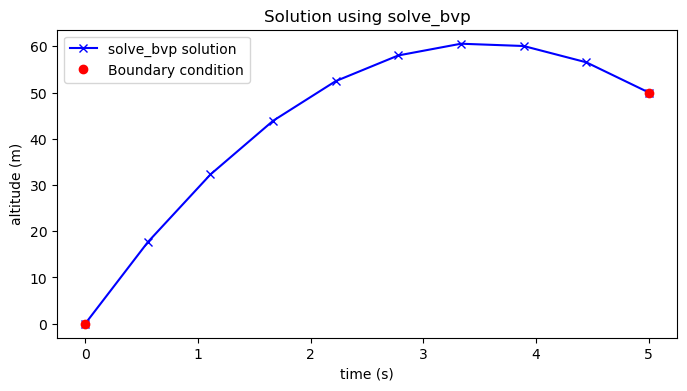

In [13]:
from scipy.integrate import solve_bvp

# Define the differential equations
def fun(t, y):
    return np.vstack((y[1], -9.8 * np.ones_like(y[0])))

# Define the boundary conditions
def bc(ya, yb):
    return np.array([ya[0], yb[0] - 50])

# Initial guess for the solution
t_guess = np.linspace(0, 5, 10)
y_guess = np.zeros((2, t_guess.size))
y_guess[1] = 4.5  # Initial guess for y'

# Solve the BVP
sol_bvp = solve_bvp(fun, bc, t_guess, y_guess)

# Plot the solution
plt.figure(figsize=(8, 4))
plt.plot(sol_bvp.x, sol_bvp.y[0], 'bx-',label='solve_bvp solution')
plt.plot(5, 50, 'ro', label='Boundary condition')
plt.plot(0, 0, 'ro')
plt.xlabel('time (s)')
plt.ylabel('altitude (m)')
plt.legend()
plt.title('Solution using solve_bvp')
plt.show()

## One challenge, boundary layer problems. (MAT230)
$$
\epsilon f'' + f' =2x-1 , \ f(0)=1, \ f(1)=4, \ 0<\epsilon << 1
$$

with exact solution
$$
f_{ex}(x)=x^2+x+2-e^{-x/\epsilon}+\epsilon (2 (1-x)-2 e^{-x/\epsilon})
$$


In [68]:
def f_exact(x,epsilon=0.01):
    out=x*x+x+2-np.exp(-x/epsilon)+epsilon*(2*(1-x)-2*np.exp(-x/epsilon))
    return out

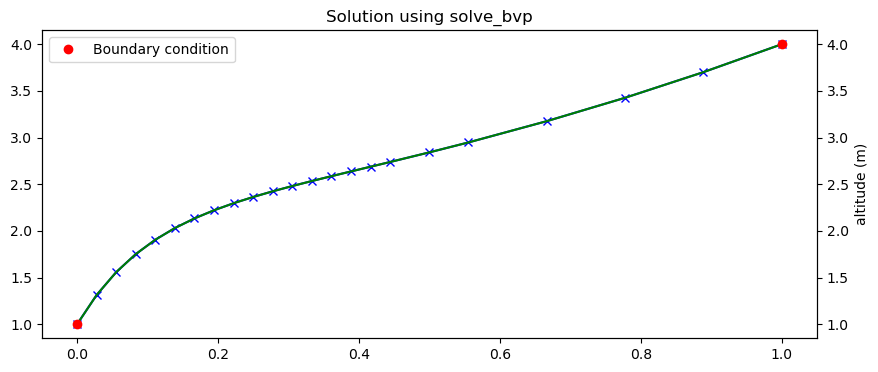

In [69]:
from scipy.integrate import solve_bvp
epsilon=0.1
# Define the differential equations
def fun(t, y):
    return np.vstack((y[1], (-y[1]+2*t+1)/epsilon))

# Define the boundary conditions
def bc(ya, yb):
    return np.array([ya[0]-1, yb[0] - 4])

# Initial guess for the solution
t_guess = np.linspace(0, 1, 10)
y_guess = np.zeros((2, t_guess.size))
#y_guess[1] =   # Initial guess for y'

# Solve the BVP
sol_bvp = solve_bvp(fun, bc, t_guess, y_guess)

# Plot the solution
plt.figure(figsize=(10, 4))
plt.plot(sol_bvp.x, sol_bvp.y[0], 'bx-',label='solve_bvp solution')
plt.plot(sol_bvp.x, f_exact(sol_bvp.x,epsilon), 'g-',label='exact solution')
ax2 = plt.twinx()
sol_diff=sol_bvp.y[0] - f_exact(sol_bvp.x, epsilon)
#ax2.plot(sol_bvp.x, sol_diff, 'r--', label='difference')
#ax2.set_ylim([np.min(sol_diff), np.max(sol_diff)])
plt.plot(1, 4, 'ro', label='Boundary condition')
plt.plot(0, 1, 'ro' )
plt.xlabel('time (s)')
plt.ylabel('altitude (m)')
plt.legend()
plt.title('Solution using solve_bvp')
plt.show()

<font color='green'> Can you plot the error between the exact and numerical solution?

Change $\epsilon$, what do you see? 


Use our shooting and finite difference method above, will they work?  </font>


In [77]:
from scipy.integrate import solve_bvp
from ipywidgets import interact, FloatLogSlider
@interact(epsilon=FloatLogSlider(value=0.1, base=10, min=-4, max=-1, step=0.1, description='epsilon'))
def plot_bvp(epsilon):
    # Define the differential equations
    def fun(t, y):
        return np.vstack((y[1], (-y[1]+2*t+1)/epsilon))

    # Define the boundary conditions
    def bc(ya, yb):
        return np.array([ya[0]-1, yb[0] - 4])

    t_guess = np.linspace(0, 1, 40)
    y_guess = np.zeros((2, t_guess.size))

    sol_bvp = solve_bvp(fun, bc, t_guess, y_guess)

    fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
    fig.suptitle(f'Solution using solve_bvp, epsilon={epsilon:.4g}')
    axs[0].plot(sol_bvp.x, sol_bvp.y[0], 'bx-', label='solve_bvp solution')
    axs[0].plot(sol_bvp.x, f_exact(sol_bvp.x, epsilon=epsilon), 'g-', label='exact solution')
    axs[0].plot(1, 4, 'ro', label='Boundary condition')
    axs[0].plot(0, 1, 'ro')
    axs[0].set_ylabel('altitude (m)')
    axs[0].legend()
    
    sol_diff = sol_bvp.y[0] - f_exact(sol_bvp.x, epsilon)
    print(f'Max error: {np.max(np.abs(sol_diff))}')
    print(f"f_exact(1, epsilon={epsilon}) = {f_exact(1, epsilon=epsilon)}")
    print(f"f_exact(0, epsilon={epsilon}) = {f_exact(0, epsilon=epsilon)}")
    print(f"sol_bvp.y[0][-1] = {sol_bvp.y[0][-1]}")
    print(f"sol_bvp.y[0][0] = {sol_bvp.y[0][0]}")
    axs[1].plot(sol_bvp.x, sol_diff, 'r--', label='error')
    axs[1].set_xlabel('time (s)')
    axs[1].set_ylabel('error')
    axs[1].legend()
    
    plt.tight_layout()
    #plt.plot(sol_bvp.x, sol_diff, 'r--', label='error')
    
    plt.show()


interactive(children=(FloatLogSlider(value=0.1, description='epsilon', max=-1.0, min=-4.0), Output()), _dom_cl…

array([0.00000000e+00, 1.12529070e-05, 2.02853135e-05, 2.75123864e-05,
       3.32785244e-05, 3.78672640e-05, 4.15105434e-05, 4.43970530e-05,
       4.66795698e-05, 4.84812790e-05, 4.99011411e-05, 5.10183964e-05,
       5.18963096e-05, 5.25852579e-05, 5.31252609e-05, 5.35480413e-05,
       5.38786956e-05, 5.37707258e-05, 5.39667577e-05, 5.08305311e-05,
       5.23840943e-05, 5.37489564e-05, 5.44799157e-05])

In [64]:
f_exact(1, epsilon=1.e-1)

np.float64(3.9999455200842853)